# 示例

In [1]:
from datetime import datetime

import pandas as pd

from GrADS import GrADS

## 中国自动站与CMORPH降水产品融合的逐时降水量网格数据集（1.0版）
- 手动重设时间


实例化时传入`ctl_path`和`bin_path`

In [2]:
ctl_path = '__test/CHN_PRCP_HOUR_MERG_DISPLAY_0.1deg.lnx.ctl'
bin_path = '__test/surf_cli_chn_merge_cmp_pre_hour_grid_0.10SURF_CLI_CHN_MERGE_CMP_PRE_HOUR_GRID_0.10-2018081707.grd'
grads = GrADS(ctl_path=ctl_path, bin_path=bin_path)

等价于先实例化再设置`ctl_path`和`bin_path`：
```python
grads = GrADS()
grads.set_ctl_path(ctl_path)
grads.set_bin_path(bin_path)
```
传入`ctl_path`后立即会对ctl文件进行解析，可通过`.ctl_lines`查看原文，`.ctl`查看解析结果字典，该字典仅供查看，对该字典进行的修改不会有任何效果

In [3]:
print(''.join(grads.ctl_lines))

DSET ^SEVP_CLI_CHN_MERGE_FY2_PRE_HOUR_GRID_0.10-%y4%m2%d2%h2.grd
*
UNDEF -999.0
*
OPTIONS   little_endian  template
*
TITLE  China Hourly Merged Precipitation Analysis
*
xdef  700 linear  70.05  0.10
*
ydef  440 linear  15.05  0.10 
*
ZDEF     1 LEVELS 1  
*
TDEF 9999 LINEAR 00Z01Aug2010 1hr 
*
VARS 2                           
crain      1 00  CH01   combined analysis (mm/Hour)
gsamp      1 00  CH02   gauge numbers
ENDVARS



In [4]:
grads.ctl

{'undef': -999.0,
 'dtype': '<f4',
 'template': True,
 'lon': array([ 70.05,  70.15,  70.25,  70.35,  70.45,  70.55,  70.65,  70.75,
         70.85,  70.95,  71.05,  71.15,  71.25,  71.35,  71.45,  71.55,
         71.65,  71.75,  71.85,  71.95,  72.05,  72.15,  72.25,  72.35,
         72.45,  72.55,  72.65,  72.75,  72.85,  72.95,  73.05,  73.15,
         73.25,  73.35,  73.45,  73.55,  73.65,  73.75,  73.85,  73.95,
         74.05,  74.15,  74.25,  74.35,  74.45,  74.55,  74.65,  74.75,
         74.85,  74.95,  75.05,  75.15,  75.25,  75.35,  75.45,  75.55,
         75.65,  75.75,  75.85,  75.95,  76.05,  76.15,  76.25,  76.35,
         76.45,  76.55,  76.65,  76.75,  76.85,  76.95,  77.05,  77.15,
         77.25,  77.35,  77.45,  77.55,  77.65,  77.75,  77.85,  77.95,
         78.05,  78.15,  78.25,  78.35,  78.45,  78.55,  78.65,  78.75,
         78.85,  78.95,  79.05,  79.15,  79.25,  79.35,  79.45,  79.55,
         79.65,  79.75,  79.85,  79.95,  80.05,  80.15,  80.25,  80.35,
   

可以看到，这个ctl文件是个template，`tdef`所描述的时间并不是某个具体bin文件的对应时间，所以在读取bin文件前先手动重设一下时间（以后可能添加自动从文件名获取时间的功能）。重设时间有两种方式：
1. 完全重设`tdef`
2. 指定`tdef`的开始时间，整个`tdef`根据开始时间平移
此例中采用第一种方式

In [5]:
time = pd.date_range(datetime.strptime(bin_path[-14:-4], '%Y%m%d%H'), periods=1)
grads.reset_time(time=time)

In [6]:
crain = grads.get('crain')
crain

<xarray.DataArray 'crain' (time: 1, level: 1, lat: 440, lon: 700)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * level    (level) float64 1.0
  * lat      (lat) float64 15.05 15.15 15.25 15.35 ... 58.65 58.75 58.85 58.95
  * lon      (lon) float64 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.8 139.9
  * time     (time) datetime64[ns] 2018-08-17T07:00:00

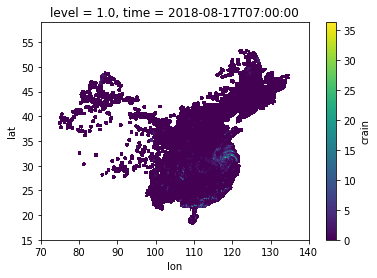

In [7]:
crain.plot()

## WRF V3.8 MODEL
- 手动重设时间
- 手动重设字节顺序
- LCC投影坐标系
- 按时刻读取

In [8]:
ctl_path = '__test/wrfoutd02.ctl'
bin_path = '__test/wrf02d2020072312.dat'

In [9]:
grads = GrADS()
grads.set_ctl_path(ctl_path)
grads.set_bin_path(bin_path)
ctl = grads.ctl
print('ctl文件原文：\n' + ''.join(grads.ctl_lines[:54]))
print('\n解析出的tdef:', ctl['tdef'])
print('\n解析出的dtype:', ctl['dtype'])

ctl文件原文：
dset ^wrf02d2020081212.dat
options  byteswapped
undef 1.e30
title  OUTPUT FROM WRF V3.8 MODEL
pdef  288 288 lcc  32.318  117.203  144.500  144.500  60.00000  30.00000  117.30000   3000.000   3000.000
xdef  745 linear  112.16026   0.01351351
ydef  606 linear   28.19616   0.01351351
zdef   17 levels  
1000.00000
 975.00000
 950.00000
 925.00000
 900.00000
 850.00000
 800.00000
 750.00000
 700.00000
 650.00000
 600.00000
 550.00000
 500.00000
 400.00000
 300.00000
 200.00000
 100.00000
tdef   85 linear 12Z12AUG2020      60MN      
VARS   26
XLAT           1  0  LATITUDE, SOUTH IS NEGATIVE (degree_north)
XLONG          1  0  LONGITUDE, WEST IS NEGATIVE (degree_east)
U             17  0  x-wind component (m s-1)
V             17  0  y-wind component (m s-1)
W             17  0  z-wind component (m s-1)
Q2             1  0  QV at 2 M (kg kg-1)
T2             1  0  TEMP at 2 M (K)
QVAPOR        17  0  Water vapor mixing ratio (kg kg-1)
HGT            1  0  Terrain Height (m)
TSK     

可以看到：
1. ctl文件的时间和bin文件的时间对不上（此例中，采用方式2重设时间）
2. 由于ctl文件的字节顺序是`byteswapped`，跨操作系统时就无法判断数据真实的字节顺序了（此例中，手动重设字节顺序）

In [10]:
start_time = datetime.strptime(bin_path[-14:-4], '%Y%m%d%H')
grads.reset_time(start_time=start_time)
ctl = grads.ctl
print('重设后的tdef:', ctl['tdef'])
grads.reset_dtype('>f4')

重设后的tdef: DatetimeIndex(['2020-07-23 12:00:00', '2020-07-23 13:00:00',
               '2020-07-23 14:00:00', '2020-07-23 15:00:00',
               '2020-07-23 16:00:00', '2020-07-23 17:00:00',
               '2020-07-23 18:00:00', '2020-07-23 19:00:00',
               '2020-07-23 20:00:00', '2020-07-23 21:00:00',
               '2020-07-23 22:00:00', '2020-07-23 23:00:00',
               '2020-07-24 00:00:00', '2020-07-24 01:00:00',
               '2020-07-24 02:00:00', '2020-07-24 03:00:00',
               '2020-07-24 04:00:00', '2020-07-24 05:00:00',
               '2020-07-24 06:00:00', '2020-07-24 07:00:00',
               '2020-07-24 08:00:00', '2020-07-24 09:00:00',
               '2020-07-24 10:00:00', '2020-07-24 11:00:00',
               '2020-07-24 12:00:00', '2020-07-24 13:00:00',
               '2020-07-24 14:00:00', '2020-07-24 15:00:00',
               '2020-07-24 16:00:00', '2020-07-24 17:00:00',
               '2020-07-24 18:00:00', '2020-07-24 19:00:00',
              

In [11]:
ctl['vars']

,layers,describe,layer_start,count
name,,,,
XLAT,1,"LATITUDE, SOUTH IS NEGATIVE (degree_north)\n",0,82944
XLONG,1,"LONGITUDE, WEST IS NEGATIVE (degree_east)\n",1,82944
U,17,x-wind component (m s-1)\n,2,1410048
V,17,y-wind component (m s-1)\n,19,1410048
W,17,z-wind component (m s-1)\n,36,1410048
Q2,1,QV at 2 M (kg kg-1)\n,53,82944
T2,1,TEMP at 2 M (K)\n,54,82944
QVAPOR,17,Water vapor mixing ratio (kg kg-1)\n,55,1410048
HGT,1,Terrain Height (m)\n,72,82944


In [12]:
u = grads.get('U')  # 只传入变量名则提取该变量所有时刻的数据
u

<xarray.DataArray 'U' (time: 85, level: 17, y: 288, x: 288)>
array([[[[            nan,             nan,             nan, ...,
           2.77169824e+00,  3.07102656e+00,  3.31282449e+00],
         [            nan,             nan,             nan, ...,
                      nan,  2.79950690e+00,  3.05219388e+00],
         [            nan,             nan,             nan, ...,
                      nan,  2.63603354e+00,  2.85936546e+00],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[ 2.62512386e-01, -1.60177797e-03, -1.85498789e-01, ...,
           4.23189878e+00,  4.45152521e+00,  4.60541344e+00],
         [ 1.85542539e-01, -6.41513243e-02, -2.23875970e-01, ...,
           4.10180235e+00,  4.28800201e+00,  4.45228195e+00],
         [ 2.11142436e-01, -1.34028941e-02, -2.16827691e-01, ...,
           4.03538799e+00,  4.17913294e+00,  4.32520342e+00],
...
           2.07028961e+01,  2.14673443e+01,  2.20360126e+01],
         [ 1.86485844e+01,  1.88323231e+01,  1.89630356e+01, ...,
           1.97542439e+01,  2.06195030e+01,  2.13941364e+01],
         [ 1.84957428e+01,  1.86489449e+01,  1.87963581e+01, ...,
           1.92881126e+01,  2.00290623e+01,  2.07678680e+01]],

        [[-3.91786027e+00, -4.03973532e+00, -4.27022362e+00, ...,
          -9.51654148e+00, -9.61816788e+00, -9.71819782e+00],
         [-3.41373730e+00, -3.32044125e+00, -3.83375788e+00, ...,
          -9.51468468e+00, -9.65749645e+00, -9.74324322e+00],
         [-2.87189889e+00, -2.61522150e+00, -3.57420015e+00, ...,
          -9.45381832e+00, -9.61312580e+00, -9.71311951e+00],
         ...,
         [ 4.22682381e+00,  4.40167522e+00,  4.61008024e+00, ...,
           6.15876377e-01,  7.06349254e-01,  7.90788829e-01],
         [ 4.28198099e+00,  4.47080135e+00,  4.65984631e+00, ...,
           6.61895752e-01,  7.65912592e-01,  8.48375142e-01],
         [ 4.33911991e+00,  4.42436695e+00,  4.50606918e+00, ...,
           6.81228042e-01,  7.75114775e-01,  8.68816495e-01]]]],
      dtype=float32)
Coordinates:
  * level    (level) float64 1e+03 975.0 950.0 925.0 ... 400.0 300.0 200.0 100.0
  * x        (x) int32 0 1 2 3 4 5 6 7 8 ... 279 280 281 282 283 284 285 286 287
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 279 280 281 282 283 284 285 286 287
  * time     (time) datetime64[ns] 2020-07-23T12:00:00 ... 2020-07-27

In [13]:
grads.get('U', time=[0, 3, 2])  # time参数为一个整数列表时，提取该变量在第这些时次的数据，不进行排序

<xarray.DataArray 'U' (time: 3, level: 17, y: 288, x: 288)>
array([[[[            nan,             nan,             nan, ...,
           2.77169824e+00,  3.07102656e+00,  3.31282449e+00],
         [            nan,             nan,             nan, ...,
                      nan,  2.79950690e+00,  3.05219388e+00],
         [            nan,             nan,             nan, ...,
                      nan,  2.63603354e+00,  2.85936546e+00],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[ 2.62512386e-01, -1.60177797e-03, -1.85498789e-01, ...,
           4.23189878e+00,  4.45152521e+00,  4.60541344e+00],
         [ 1.85542539e-01, -6.41513243e-02, -2.23875970e-01, ...,
           4.10180235e+00,  4.28800201e+00,  4.45228195e+00],
         [ 2.11142436e-01, -1.34028941e-02, -2.16827691e-01, ...,
           4.03538799e+00,  4.17913294e+00,  4.32520342e+00],
...
           2.51950150e+01,  2.52549782e+01,  2.52603683e+01],
         [ 1.61180916e+01,  1.62879562e+01,  1.64109459e+01, ...,
           2.50971375e+01,  2.51506367e+01,  2.51584244e+01],
         [ 1.62192135e+01,  1.63057938e+01,  1.64022312e+01, ...,
           2.50009003e+01,  2.50416908e+01,  2.50472603e+01]],

        [[-1.69330711e+01, -1.68869610e+01, -1.68361492e+01, ...,
          -3.54720283e+00, -3.51224637e+00, -3.47308469e+00],
         [-1.68744507e+01, -1.68130054e+01, -1.67557220e+01, ...,
          -3.62879753e+00, -3.73877335e+00, -3.63337111e+00],
         [-1.68279305e+01, -1.67767124e+01, -1.67322674e+01, ...,
          -3.58224177e+00, -3.63816857e+00, -3.56557369e+00],
         ...,
         [ 1.47482169e+00,  1.51248550e+00,  1.46995413e+00, ...,
           5.80016136e+00,  5.85079908e+00,  5.95960093e+00],
         [ 1.56478524e+00,  1.59527981e+00,  1.56938469e+00, ...,
           5.78544188e+00,  5.84355640e+00,  5.94647551e+00],
         [ 1.61364448e+00,  1.62905252e+00,  1.63873649e+00, ...,
           5.78590870e+00,  5.87092876e+00,  5.96138144e+00]]]],
      dtype=float32)
Coordinates:
  * level    (level) float64 1e+03 975.0 950.0 925.0 ... 400.0 300.0 200.0 100.0
  * x        (x) int32 0 1 2 3 4 5 6 7 8 ... 279 280 281 282 283 284 285 286 287
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 279 280 281 282 283 284 285 286 287
  * time     (time) datetime64[ns] 2020-07-23T12:00:00 ... 2020-07-23T14:00:00

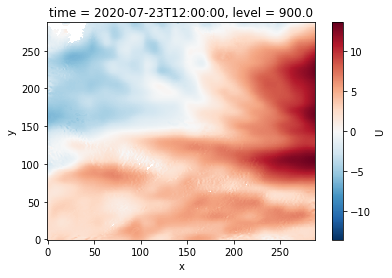

In [14]:
u = grads.get('U', time=0)  # time参数为一个整数时，提取该变量第time时次的数据
u.sel(level=900).plot()

细心的小伙伴会发现，解析后的`pdef`是两个`osgeo.osr.CoordinateTransformation`对象，你猜是干啥用的？

In [15]:
ctl['pdef']

{'lcc2geo': <osgeo.osr.CoordinateTransformation; proxy of <Swig Object of type 'OSRCoordinateTransformationShadow *' at 0x000001769A322F90> >,
 'geo2lcc': <osgeo.osr.CoordinateTransformation; proxy of <Swig Object of type 'OSRCoordinateTransformationShadow *' at 0x000001769A322F30> >}